## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 07 : Klasifikasi Bayes dan Support Vector </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Rendy Wirawan Tamrin"
myNIM = "00000053580"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Rendy Wirawan Tamrin
NIM: 		00000053580
Start: 		2023-03-23 09:36:33.002958
Device ID: 	86260214-c923-11ed-86f7-088fc3234331



---

### Dataset yang dipakai:

1. [Sentiment Analysis for Financial News] – sumber : [https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news]
2. [Avengers face recognition!] – sumber : [https://www.kaggle.com/datasets/rawatjitesh/avengers-face-recognition]

---

### Hasil kerja

#### Import Libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#### Generate Gaussian Naive Bayes

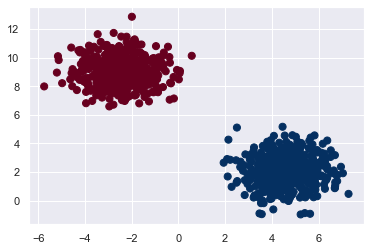

In [3]:
# Generate data from make_blobs

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

#### Split data into training & test set

[(-7.0, 8.0), (-3.0, 14.0)]

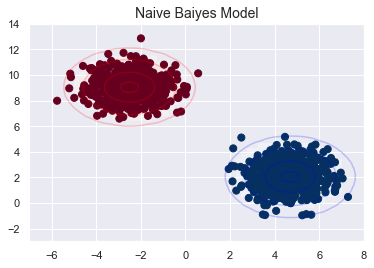

In [4]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Baiyes Model', size=14)

xlim = (-7, 8)
ylim = (-3, 14)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

#### Implement GaussianNB with Sklearn

In [5]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

#### Generating new data and predict the label

In [6]:
rng = np.random.RandomState(0)
Xnew = rng.uniform(low=-6, high=15, size=(2000, 2))
ynew = model.predict(Xnew)

#### Plot the new data to know where the decision boundary is

(-6.402199320440172, 7.935956540563485, -1.658930779202378, 13.558729447331872)

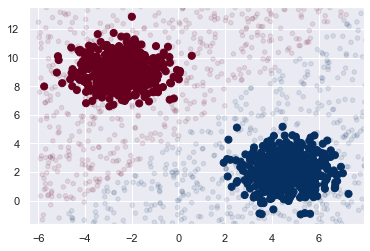

In [7]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim=plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

#### Calculates the predicted probabilities of the classes for the new data

In [8]:
yprob = model.predict_proba(Xnew)
yprob[-10:].round(2)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ]])

# Multinomial Naive Bayes    

#### Import Dataset

In [13]:
data = pd.read_csv("all-data.csv", names=['Label', 'Text'], encoding="latin-1")
data.head()

,Label,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


#### Check NaN value

In [14]:
data.isnull().sum()

Label    0
Text     0
dtype: int64

#### Print the unique value in data['Label']

In [15]:
print(data['Label'].unique())

['neutral' 'negative' 'positive']


#### Splitting train and test data

In [16]:
X = data['Text']
y = data['Label']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Modelling

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Converting the content of string into a vector of number and create the pipeline that attaches it to a multinomial Naive Bayes Classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

#### Fit Model And Predict Labels

In [20]:
model.fit(X_train, y_train)
label_pred = model.predict(X_test)

#### Model Evaluation

Text(89.18, 0.5, 'Predicted Label')

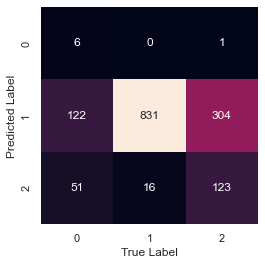

In [25]:
# Evaluating model with confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, label_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("True Label")
plt.ylabel('Predicted Label')

#### Model Testing by predicting for a single string

In [57]:
def predict_category(s, train=y_train, model=model):
    pred = model.predict([s])
    return [pred[0]]

predict_category('The new agreement is a continuation to executing the plan that has been made')

['neutral']

# Support Vector Machine (SVM)

#### Import Libraries

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

#### Generate new data

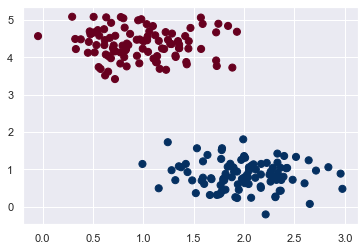

In [68]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std = 0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

#### Visualization

(-1.0, 3.5)

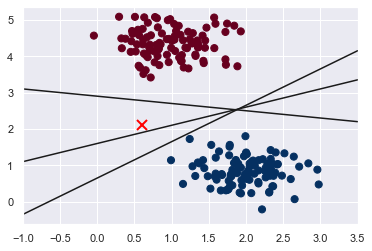

In [69]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

#### Maximizing the Margin

(-1.0, 3.5)

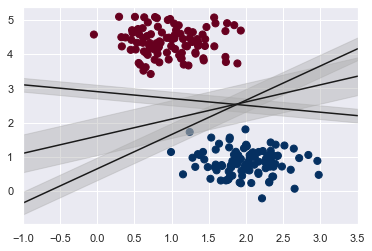

In [70]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

#### Fit model

In [71]:
from sklearn.svm import SVC # "Support Vector Classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

#### Make SVM Decision Boundaries Visualization Function

In [72]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels = [-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#### Plot SVM Decision Boundaries

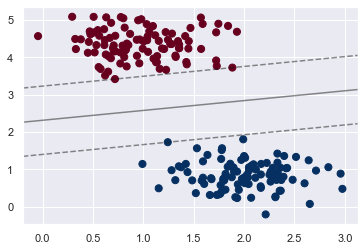

In [74]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plot_svc_decision_function(model)

In [75]:
model.support_vectors_

array([[0.71882272, 3.41442607],
       [1.88417193, 3.72204106],
       [1.24299373, 1.7234608 ]])

#### Difference between the models that is learned from first 60 points & learned from first 120 points

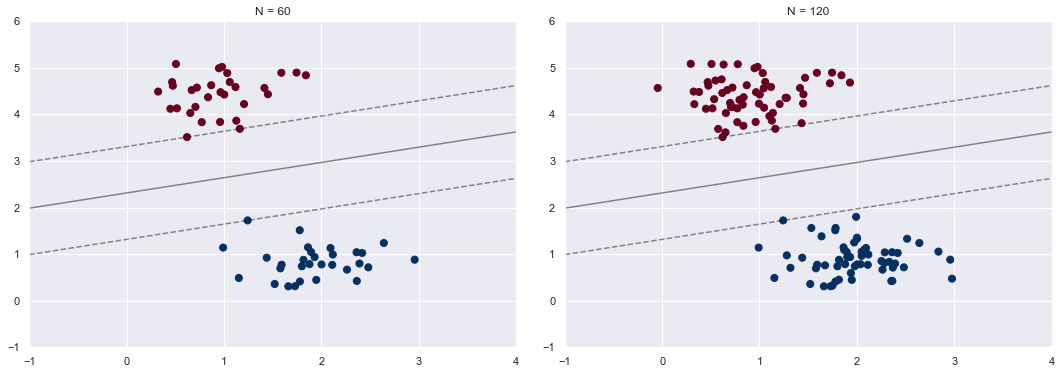

In [77]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std = 0.4)

    X = X[:N]
    y = y[:N]

    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left = 0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

#### Interactive SVM model

In [78]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

#### Creating SVM models with non-linear data to motivate the need for kernels

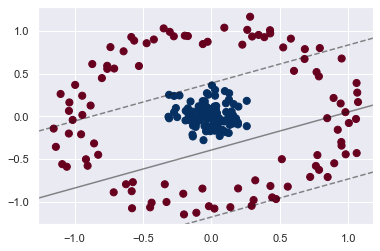

In [87]:
from sklearn.datasets._samples_generator import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plot_svc_decision_function(clf, plot_support=False)

#### Compute a radial basis function centered on the middle clump

In [88]:
r = np.exp(-(X ** 2).sum(1))

#### Interactive 3D Visualization of the Model

In [89]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='RdBu')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180), X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.04098035,  0.03677237],
       [-1.13664594, -0.35763323],
       [-0.01778639, -1.05286544],
       [-0.06519067, -0.84618435],
       [ 0.1977727 ,  0.11356286],
       [ 0.52555665,  0.80654759],
       [ 0.13897712,  0.01063534],
       [-0.27437354,  0.93663555],
       [ 0.76910144,  0.51830849],
       [ 0.84702611, -0.02193974],
       [ 0.10856228,  0.05045004],
       [ 0.76435188, -0.58126995],
       [-0.15207207,  0.17354955],
       [ 0.06152342, -0.06549774],
       [-0.80021732,  0.44729634],
       [-0.94405048,  0.24087326],
       [ 0.15960306,  0.01056585],
       [ 0.13034764,  0.27008025],
       [-0.91664535, -0.50325447],
       [ 0.02479861, -0.16854474],
       [ 0.77535816, -0.45410216],
       [-0.06214558,  0.84569191],
       [ 0.30901545, -0.98072233],
       [ 0.51540732, -0.50192767],
       [-0.13890203, -0.0169392 ],
       [ 0.38738575,  0.92647445],
       [-1.09019025, -0.56010021],
       [

#### Apply Kernelized SVM

In [90]:
# Change linear kernel to an RBF kernel
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

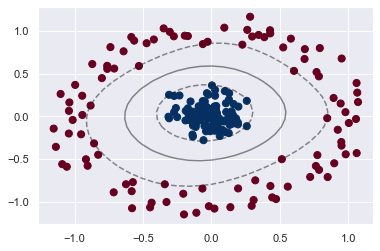

In [91]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=300, lw=1, facecolors='none')

#### Tuning the SVM: Softening Margins

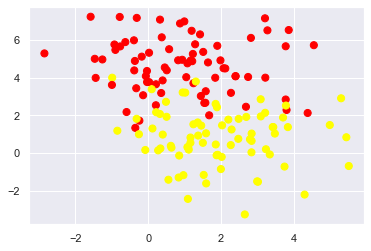

In [95]:
# Overlapping Data
X, y = make_blobs(n_samples=150, centers=2, random_state=0, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

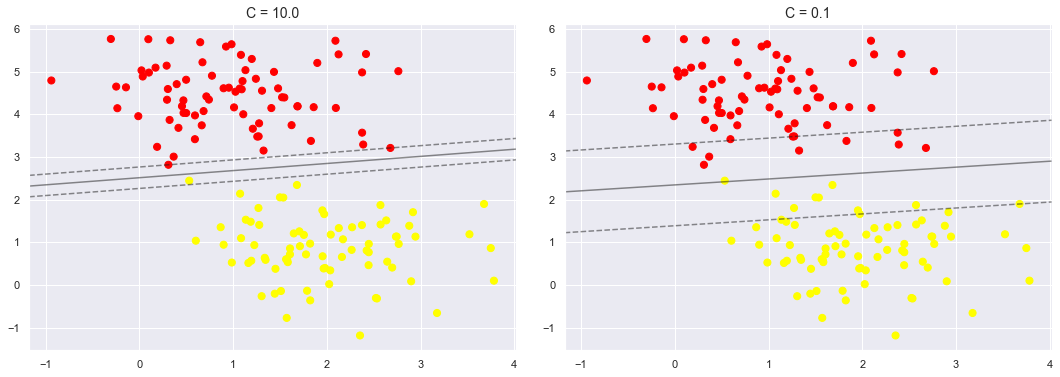

In [99]:
# Visual picture of how a changing C parameter affects the final fit
X, y = make_blobs(n_samples=150, centers=2, random_state=0, cluster_std=0.75)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Face Recognition

In [242]:
import os
import cv2

# Set directory lcoation
directory = '../Week7/cropped_images'

# List the name of the Avengers
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)

['chris_evans', 'chris_hemsworth', 'mark_ruffalo', 'robert_downey_jr', 'scarlett_johansson']


In [243]:
os.listdir(directory)

['chris_evans',
 'chris_hemsworth',
 'mark_ruffalo',
 'robert_downey_jr',
 'scarlett_johansson']

#### Finding the minimum height and width of the face images

In [244]:
def images_read(directory):
    image_width_min = 10000
    image_height_min = 10000
    
    # checking the size of each file
    for path, subdirs, files in os.walk(directory):
        for name in files:
            if os.path.splitext(name)[1] == ".png":
                image=cv2.imread(os.path.join(path, name))

                # updating minimum size
                height = image.shape[0]
                width = image.shape[1]
                
                if height < image_height_min:
                    image_height_min = height
                
                if width < image_width_min:
                    image_width_min = width
                    
    print('Image minimum width:'+str(image_width_min)+'\n'+'Image minimum height:'+str(image_height_min))
           
images_read(directory)

Image minimum width:58
Image minimum height:58


#### Resize all the images from the directory to the minimum dimensions

In [245]:
def images_resize(directory):
    list_target_names = []
    list_images = []
    
    for path, subdirs, files in os.walk(directory):
        for name in files:
            if os.path.splitext(name)[1] == ".png":
                image=cv2.imread(os.path.join(path, name))
                image_new=cv2.resize(image, (58, 58))
                list_target_names.append(os.path.basename(path))
                list_images.append(image_new)
    
    return { "target_names": list_target_names, "images": list_images }

# stores the images and the names in a dictionary
target_names = images_resize(directory)['target_names']
images = images_resize(directory)['images']

#### Plot a few of these faces

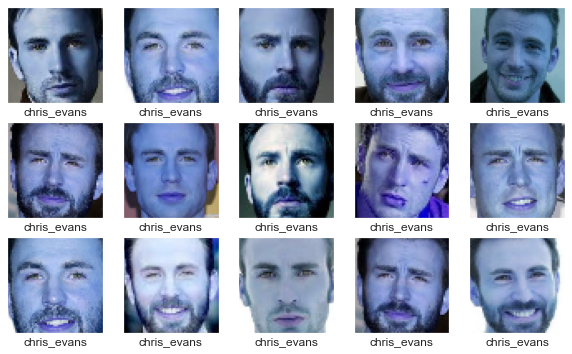

In [246]:
# call the function to read in the images
image_dict = images_resize(directory)

# access the target names and images lists from the dictionary
target_names = image_dict['target_names']
images = image_dict['images']

# plot a few images
fig, ax = plt.subplots(3, 5, figsize=(10,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=target_names[i])

#### Because its only shows the Chris Evan's faces, we need to randomize the image so that we can get the random output of faces and their names.

In [247]:
#import random

# Combine the target_names and images lists using zip
#combined = list(zip(np.array(target_names), np.array(images)))

# Shuffle the combined list while keeping initial order
#random.shuffle(combined)

# Unzip the shuffled list back into target_names_shuffled and images_shuffled lists
#target_names_shuffled, images_shuffled = zip(*combined)

from sklearn.utils import shuffle
target_names_shuffled, images_shuffled = shuffle(np.array(target_names), np.array(images))

In [248]:
class_dict = {}
count = 0
for x in np.unique(target_names_shuffled):
    class_dict[x] = count
    count = count + 1
class_dict

{'chris_evans': 0,
 'chris_hemsworth': 1,
 'mark_ruffalo': 2,
 'robert_downey_jr': 3,
 'scarlett_johansson': 4}

In [249]:
target_shuffled = []

for y in target_names_shuffled:
    target_shuffled.append(class_dict[y])

#### Plot the shuffled images

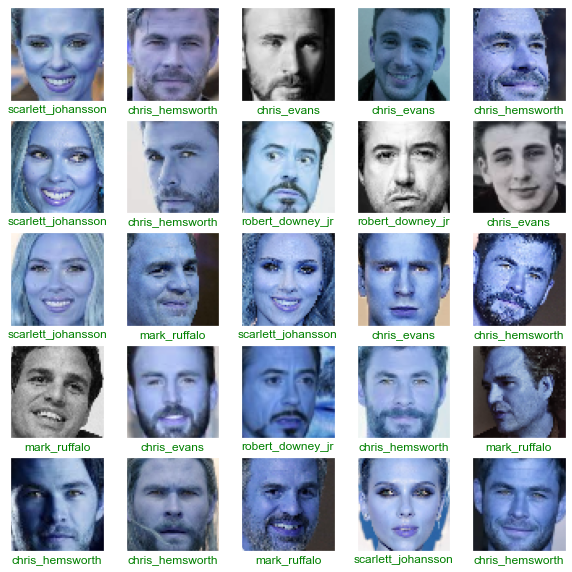

In [252]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_shuffled[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=target_names_shuffled[i])
    axi.xaxis.label.set_color('green')

#### Implementing PCA to Extract 150 Fundamental Components

In [253]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

#### Split data train and test

In [254]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(images_shuffled, target_shuffled, random_state=42)

#### Explore and Find The Best Combinations of Parameters with Grid Search Cross-Validation

In [255]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain.reshape(205,10092), ytrain) # Reshape array to 2d
print(grid.best_params_)

CPU times: total: 1min
Wall time: 24.5 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [257]:
model = grid.best_estimator_
yfit = model.predict(Xtest.reshape(69,10092))

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

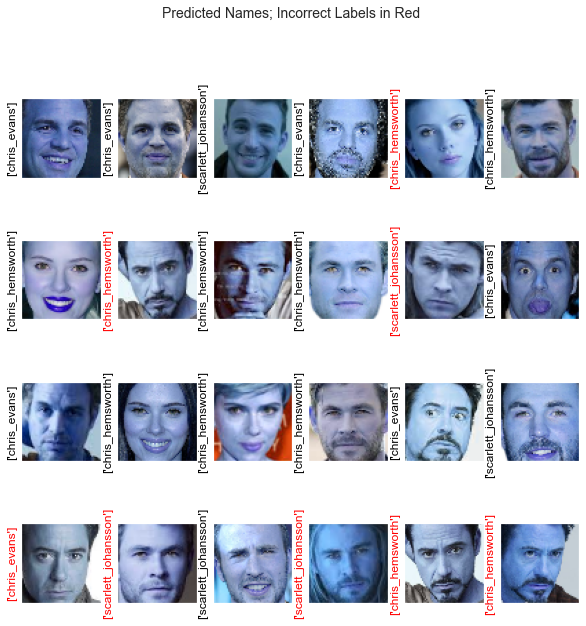

In [261]:
fig, ax = plt.subplots(4, 6, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(np.unique(target_names_shuffled[yfit[i]].split()[-1]),
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [259]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=np.unique(target_names_shuffled)))

                    precision    recall  f1-score   support

       chris_evans       0.44      0.89      0.59         9
   chris_hemsworth       0.47      0.57      0.52        14
      mark_ruffalo       0.89      0.80      0.84        20
  robert_downey_jr       0.83      0.36      0.50        14
scarlett_johansson       0.90      0.75      0.82        12

          accuracy                           0.67        69
         macro avg       0.71      0.67      0.65        69
      weighted avg       0.74      0.67      0.67        69



#### Model Evaluation

Text(89.133125, 0.5, 'predicted label')

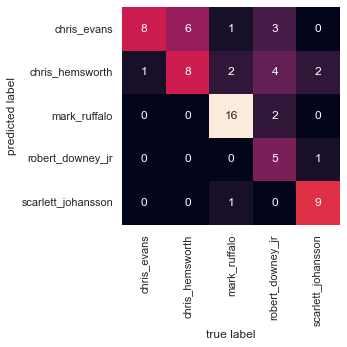

In [262]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(target_names_shuffled),
            yticklabels=np.unique(target_names_shuffled))
plt.xlabel('true label')
plt.ylabel('predicted label')

---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Dataset 1 saya berisi kumpulan sentimen berupa neutral/negative/positive berdasarkan features yang ada pada dataset tersebut, sementara dataset 2 berisi gambar wajah dari tokoh Avengers yang kemudian akan digunakan untuk melakukan face recognition dengan support vector machine.
    - Pada week ini saya belajar Naive Bayes, Support Vector Machine, dan Face recognition
        1. Naive bayes Gaussian
        Saya melakukan klasifikasi menggunakan data yang saya bangkitkan/generate sendiri yang digunakan untuk klasifikasi label berdasarkan features yang ada.
        
        2. Multinomial Naive Bayes
        Saya melakukan klasifikasi sentimen negatif/positif/neutral berdasarkan features yang ada pada dataset dengan menggunakan multinomial naive bayes.

        3. Support Vector Machine
        Saya melakukan klasifikasi dari data yang saya bangkitkan/generate sendiri, beberapa di antaranya ada yang bersifat linear dan non-linear. Berdasarkan klasifikasi yang saya lakukan, ternyata SVM mampu menerima kedua jenis data tersebut dengan memanfaatkan kernel linear untuk data linear, sementara untuk data nonlinear menggunakan RBF.

        4. Face recognition
        Saya melakukan face recognition berdasarkan dataset 2 yang menggunakan algoritma SVM

---

In [2]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Rendy Wirawan Tamrin
NIM: 		00000053580
Time-stamp:	2023-03-28 20:47:32.237461


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [ ]:
!jupyter nbconvert --to html "./IF540L_KelasEL_00000053580_RendyWirawanTamrin_Week07.ipynb" --output-dir="./"